In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
import warnings

In [3]:
warnings.filterwarnings(action = 'ignore')

In [4]:
df = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df['GENDER'] = df['GENDER'].map({'F':0,'M':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0,'YES':1})

In [7]:
cols = df.columns.tolist()[2:-1]

for col in cols:
    
    df[col] = df[col].map({1:0, 2:1})

In [8]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [9]:
X = df.drop('LUNG_CANCER', axis = 1)
Y = df['LUNG_CANCER']

x_train,x_test,y_train,y_test = train_test_split(X,Y, stratify = Y, test_size = 0.3, random_state = 2023)

In [10]:
model = AdaBoostClassifier()

# GridSearch

In [11]:
param_grid = {'n_estimators':[50,100,500],
             'learning_rate':[0.05,0.1,0.5,1],
             'algorithm':['SAMME','SAMME_R']}

GridAda = GridSearchCV(model, param_grid = param_grid, cv = 10, verbose = 1, scoring = 'f1')

GridAda.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME_R'],
                         'learning_rate': [0.05, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 500]},
             scoring='f1', verbose=1)

In [12]:
result = pd.DataFrame(GridAda.cv_results_)[['params','mean_test_score','rank_test_score']]

result = result.sort_values('rank_test_score').dropna().set_index('rank_test_score')

result

,params,mean_test_score
rank_test_score,,
1,"{'algorithm': 'SAMME', 'learning_rate': 1, 'n_...",0.948436
1,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.948436
3,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",0.946345
4,"{'algorithm': 'SAMME', 'learning_rate': 1, 'n_...",0.945844
5,"{'algorithm': 'SAMME', 'learning_rate': 1, 'n_...",0.945257
6,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.943329
7,"{'algorithm': 'SAMME', 'learning_rate': 0.5, '...",0.943283
8,"{'algorithm': 'SAMME', 'learning_rate': 0.05, ...",0.941216
9,"{'algorithm': 'SAMME', 'learning_rate': 0.05, ...",0.933405


In [13]:
best_model = GridAda.best_estimator_

print('Best hyperparmeter :', GridAda.best_params_)

Best hyperparmeter : {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 500}


# Lets Find best Threshold

In [14]:
proba = best_model.predict_proba(x_test)[:,1]

thr_list = np.arange(0,1,0.001)

f1_list = []

for thr in thr_list:
    
    result = np.where(proba > thr, 1, 0)
    
    f1_list.append(f1_score(y_test,result))
    
    
idx = np.argmax(f1_list)

print('Best Threshold :', thr_list[idx])

Best Threshold : 0.504


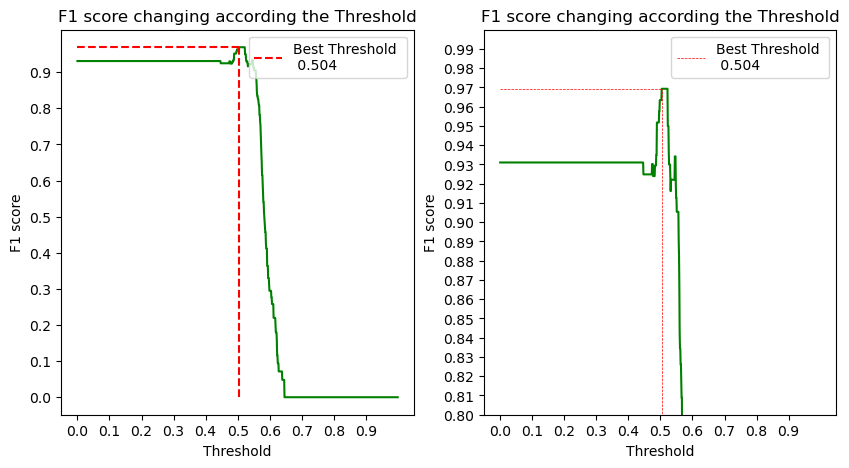

In [15]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)

plt.plot(thr_list,f1_list, c = 'green')
plt.plot([thr_list[idx],thr_list[idx]],[0,f1_list[idx]], c = 'r', ls = '--')
plt.plot([0,thr_list[idx]],[f1_list[idx],f1_list[idx]], c = 'r', ls = '--', label = f'Best Threshold \n {thr_list[idx]}')


plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.xticks(ticks = np.arange(0,1,0.1))
plt.yticks(ticks = np.arange(0,1,0.1))

plt.title('F1 score changing according the Threshold')
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)

plt.plot(thr_list,f1_list, c = 'green')
plt.plot([thr_list[idx],thr_list[idx]],[0,f1_list[idx]], c = 'r', ls = '--', lw = 0.5)
plt.plot([0,thr_list[idx]],[f1_list[idx],f1_list[idx]], c = 'r', ls = '--', lw = 0.5,label = f'Best Threshold \n {thr_list[idx]}')


plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.xticks(ticks = np.arange(0,1,0.1))
plt.yticks(ticks = np.arange(0,1,0.01))
plt.ylim([0.8,1])


plt.title('F1 score changing according the Threshold')
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'F1_score : 0.97')

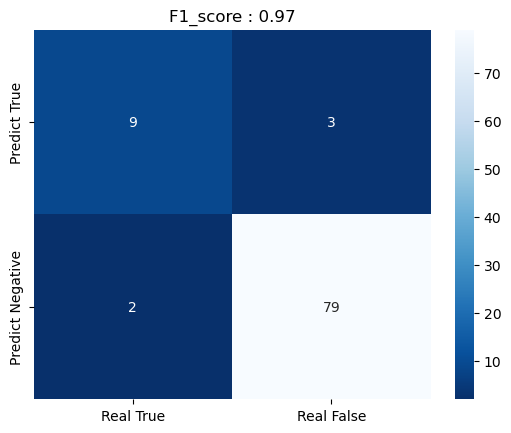

In [16]:
pred = np.where(proba > thr_list[idx],1,0)
f1 = round(f1_score(y_test,pred),2)
confusion = pd.DataFrame(confusion_matrix(y_test,pred), columns = ['Real True','Real False'], index = ['Predict True','Predict Negative'])

sns.heatmap(confusion, annot = True, cmap = 'Blues_r')
plt.title(f'F1_score : {f1}')